<a href="https://colab.research.google.com/github/keinerfan/IAP123/blob/Codes/iap123_checking_morgan_pca_ml_alghorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from matplotlib.pyplot import plot, xlabel, ylabel, show
import matplotlib.pyplot as plt  # Importing plt for show() function
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/keinerfan/IAP123/datasets/IAP123_06_morgan_fp.csv')
data.fillna(data.mean(), inplace=True)

y = data.pIC50.values.reshape((-1,1))
data = data.drop(['pIC50'] , axis = 1 )
pca = PCA(n_components=75)
pca.fit(data)
merged_data = pca.transform(data)
merged_data

array([[-1.23805145, -1.14237373, -0.81221406, ..., -0.24272899,
         0.43218288,  0.70751302],
       [ 1.08457092, -0.28431482,  0.15801625, ...,  0.05263504,
        -0.01147797,  0.13509348],
       [-1.00435128, -2.10804062, -1.07811488, ..., -0.53276483,
         0.28961978,  0.14232771],
       ...,
       [-1.54649905, -2.53699562,  3.66465272, ...,  0.00499331,
        -0.02251903,  0.37935798],
       [-1.60237284, -2.59257171,  3.70347372, ...,  0.02206407,
        -0.07385257,  0.45869008],
       [-1.52801446, -2.46397171,  3.70058085, ...,  0.20798458,
         0.12900893,  0.32009491]])

# **NUSVR**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


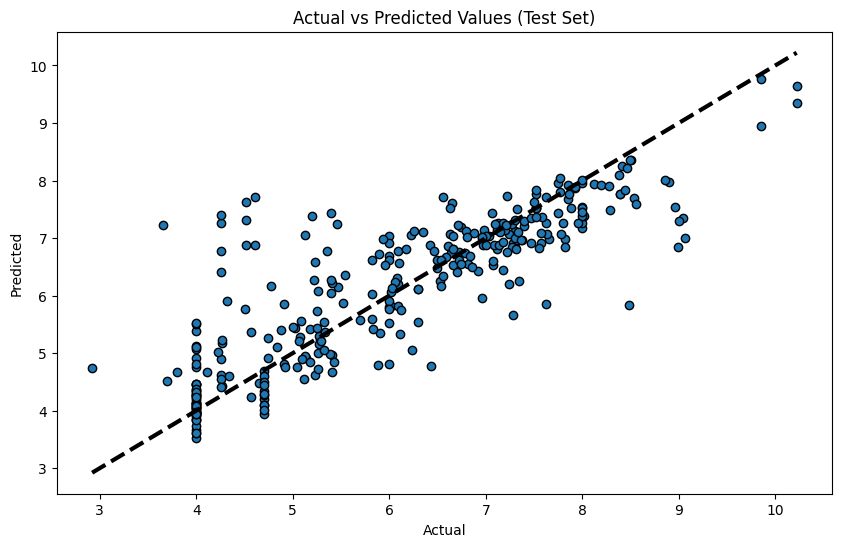

Training Set Metrics:
R-Squared: 0.8137537780129924
Adjusted R-Squared: 0.8024524295914507
Mean Squared Error (MSE): 0.40971360475579405
Mean Absolute Error (MAE): 0.40779253629586415
Mean Absolute Percentage Error (MAPE): 28.047369681124067

Testing Set Metrics:
R-Squared: 0.7206571760413143
Adjusted R-Squared: 0.637519430815515
Mean Squared Error (MSE): 0.6664928029119926
Mean Absolute Error (MAE): 0.5469808018993756
Mean Absolute Percentage Error (MAPE): 29.94242079356409


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming merged_data and y are your datasets
# Ensure your features and target are in appropriate formats
X = merged_data

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = NuSVR(kernel='rbf', C=1.0, nu=0.5)
model.fit(X_train, y_train)

# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


# SVR **bold text**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


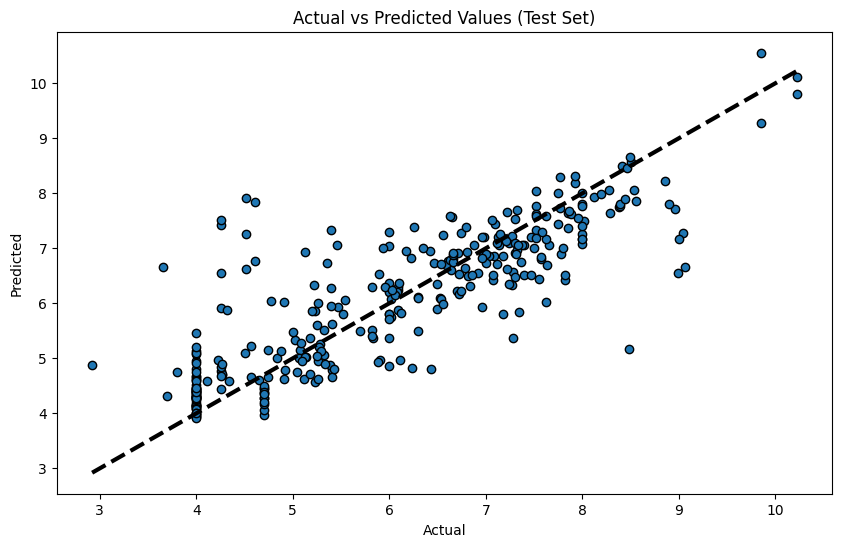

Training Set Metrics:
R-Squared: 0.8236597647520465
Adjusted R-Squared: 0.8129595077588454
Mean Squared Error (MSE): 0.38792192762956457
Mean Absolute Error (MAE): 0.39099079599239606
Mean Absolute Percentage Error (MAPE): 27.932021925053718

Testing Set Metrics:
R-Squared: 0.7150865419797823
Adjusted R-Squared: 0.6302908699499556
Mean Squared Error (MSE): 0.6797839533953021
Mean Absolute Error (MAE): 0.5740954575457944
Mean Absolute Percentage Error (MAPE): 29.469682338547454


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming merged_data and merged_y are your datasets
# Replace the following lines with your actual data loading process
# merged_data = pd.read_csv('path_to_merged_data.csv')
# merged_y = pd.read_csv('path_to_merged_y.csv')

# Sample data for demonstration purposes
# merged_data = pd.DataFrame({'feature1': range(100), 'feature2': range(100, 200)})
# merged_y = pd.Series(range(100))

# Ensure your features and target are in appropriate formats
X = merged_data


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = SVR(kernel='poly' , C=1.0, epsilon=0.2)
model.fit(X_train, y_train)

# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


# **svr hyper tunning**

# **desciison_tree regressor**

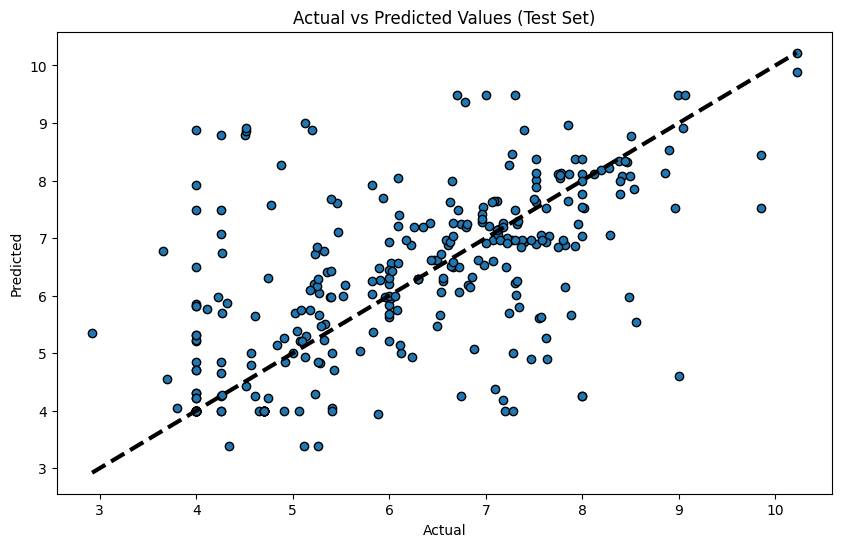

Training Set Metrics:
R-Squared: 0.9901471059137662
Adjusted R-Squared: 0.9895492361269802
Mean Squared Error (MSE): 0.021674881295737105
Mean Absolute Error (MAE): 0.033300261323596196
Mean Absolute Percentage Error (MAPE): 29.604867922910692

Testing Set Metrics:
R-Squared: 0.28031699922558273
Adjusted R-Squared: 0.06612562994748239
Mean Squared Error (MSE): 1.7171142383281575
Mean Absolute Error (MAE): 0.856292375283594
Mean Absolute Percentage Error (MAPE): 32.08493725141874


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

X = merged_data


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


elastic net regressor
# ***New Section***

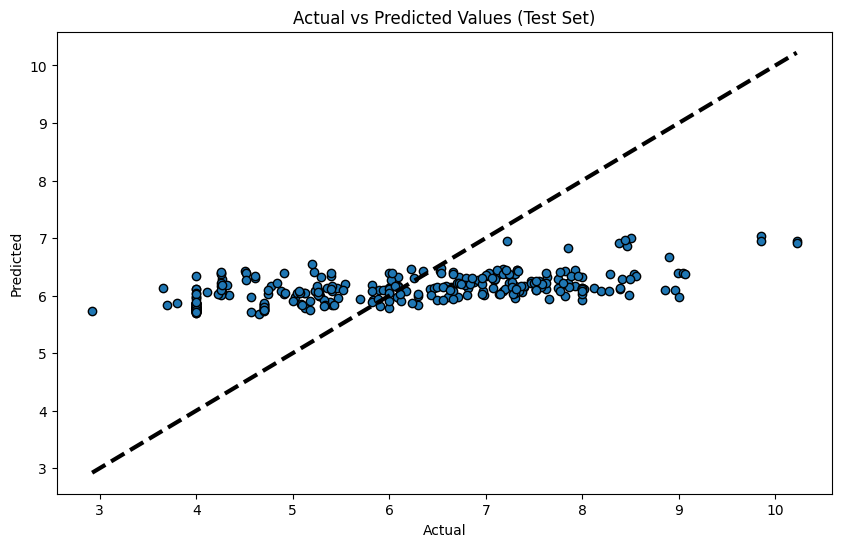

Training Set Metrics:
R-Squared: 0.18883832736315775
Adjusted R-Squared: 0.13961735208179593
Mean Squared Error (MSE): 1.7844333667018708
Mean Absolute Error (MAE): 1.1219870674549512
Mean Absolute Percentage Error (MAPE): 22.761091617114

Testing Set Metrics:
R-Squared: 0.17802793253878368
Adjusted R-Squared: -0.06660661134848289
Mean Squared Error (MSE): 1.9611689299690618
Mean Absolute Error (MAE): 1.2129284456723548
Mean Absolute Percentage Error (MAPE): 24.77065794833258


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


X = merged_data


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = ElasticNet(random_state=42)
model.fit(X_train, y_train)

# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


# KNN **regressor**

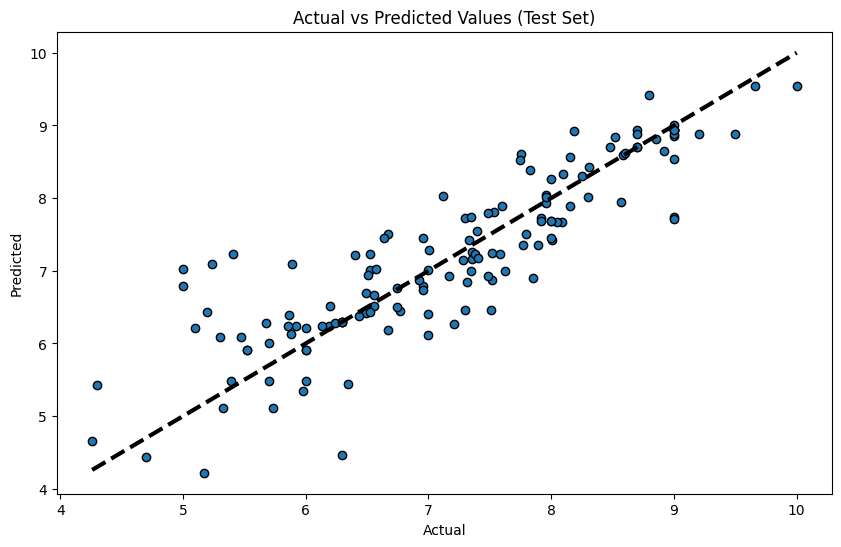

Training Set Metrics:
R-Squared: 0.8461518346320707
Adjusted R-Squared: 0.8226036460553467
Mean Squared Error (MSE): 0.26756528878773717
Mean Absolute Error (MAE): 0.34263505489335133
Mean Absolute Percentage Error (MAPE): 5.242390141535992

Testing Set Metrics:
R-Squared: 0.7662255679932706
Adjusted R-Squared: 0.5005728043492599
Mean Squared Error (MSE): 0.35491627513603713
Mean Absolute Error (MAE): 0.4285181061879285
Mean Absolute Percentage Error (MAPE): 6.546510396234773


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

X = merged_data


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = KNeighborsRegressor()
model.fit(X_train, y_train)

# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


# **extra tree **regressor** **bold text**

<ipython-input-8-6b948695c51b>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


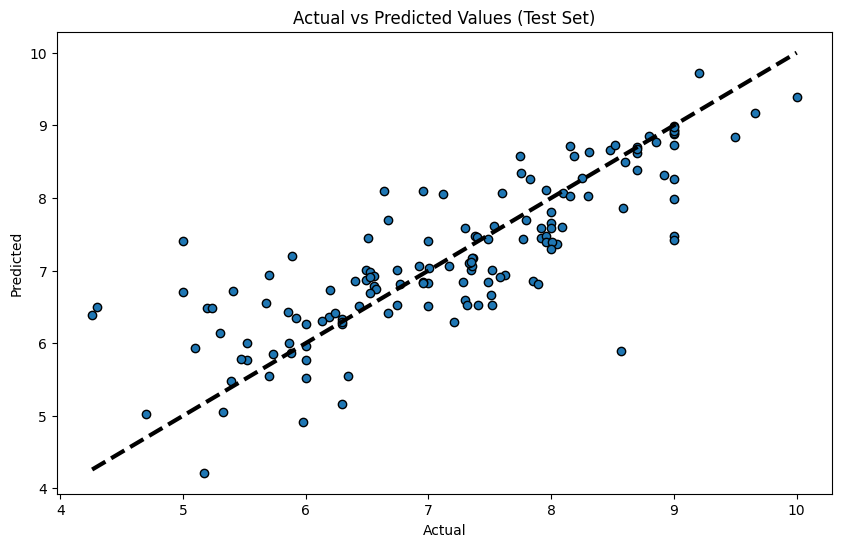

Training Set Metrics:
R-Squared: 0.9929778289327713
Adjusted R-Squared: 0.9919030068306445
Mean Squared Error (MSE): 0.012212620313193562
Mean Absolute Error (MAE): 0.027930965211311425
Mean Absolute Percentage Error (MAPE): 22.524640186912244

Testing Set Metrics:
R-Squared: 0.6644496608834436
Adjusted R-Squared: 0.28314245734190224
Mean Squared Error (MSE): 0.5094324279074888
Mean Absolute Error (MAE): 0.5116955182942033
Mean Absolute Percentage Error (MAPE): 19.119895332026452


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


X = merged_data


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = ExtraTreesRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


# **XGBoost**

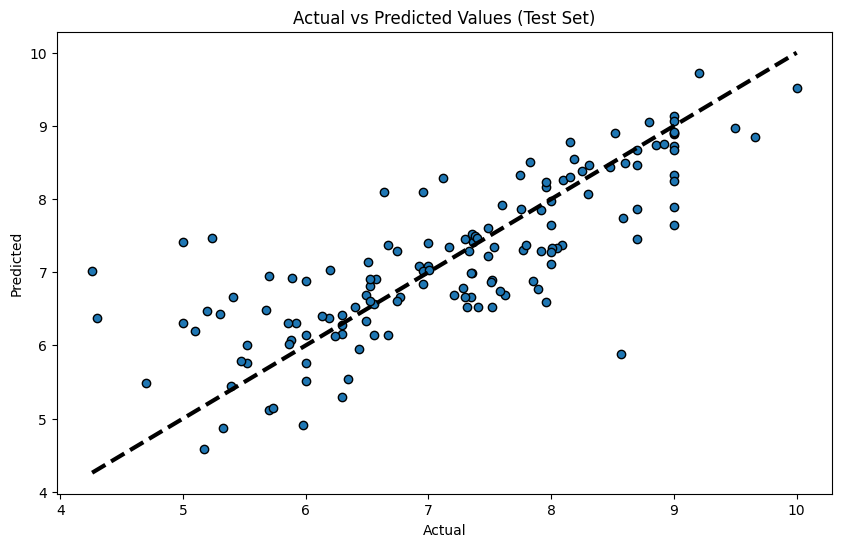

Training Set Metrics:
R-Squared: 0.9929776559929994
Adjusted R-Squared: 0.9919028074204993
Mean Squared Error (MSE): 0.01221292108168124
Mean Absolute Error (MAE): 0.028303781525539765
Mean Absolute Percentage Error (MAPE): 22.523936449502166

Testing Set Metrics:
R-Squared: 0.6273591260998514
Adjusted R-Squared: 0.20390358757695537
Mean Squared Error (MSE): 0.5657432671006184
Mean Absolute Error (MAE): 0.5456431737868708
Mean Absolute Percentage Error (MAPE): 19.155248561307843


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


X = merged_data


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()



# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


# **random forest**

<ipython-input-10-df5947c53284>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


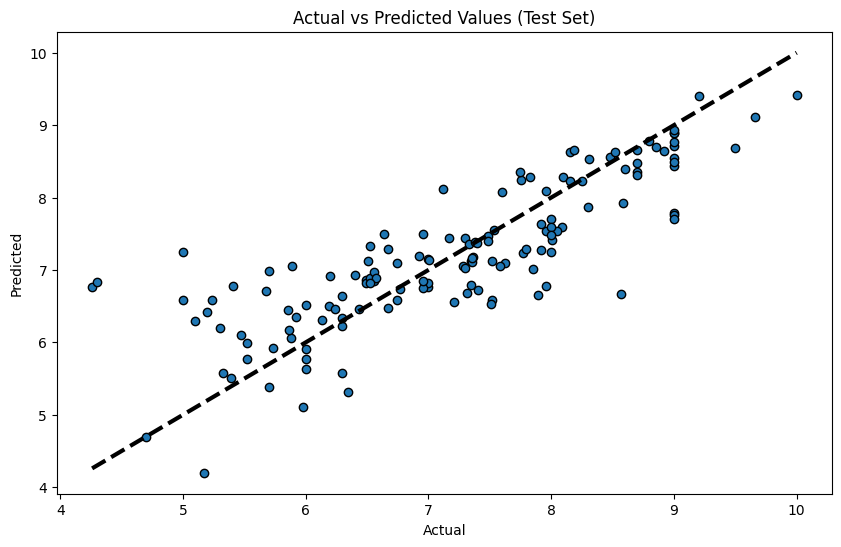

Training Set Metrics:
R-Squared: 0.9591868433047815
Adjusted R-Squared: 0.9529399315657175
Mean Squared Error (MSE): 0.07098026831440966
Mean Absolute Error (MAE): 0.1877461042506206
Mean Absolute Percentage Error (MAPE): 21.559292216852967

Testing Set Metrics:
R-Squared: 0.6870406388429182
Adjusted R-Squared: 0.3314050011644162
Mean Squared Error (MSE): 0.47513481169586547
Mean Absolute Error (MAE): 0.5061303557010507
Mean Absolute Percentage Error (MAPE): 18.673765757896614


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

X = merged_data


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


# **LINear regression **

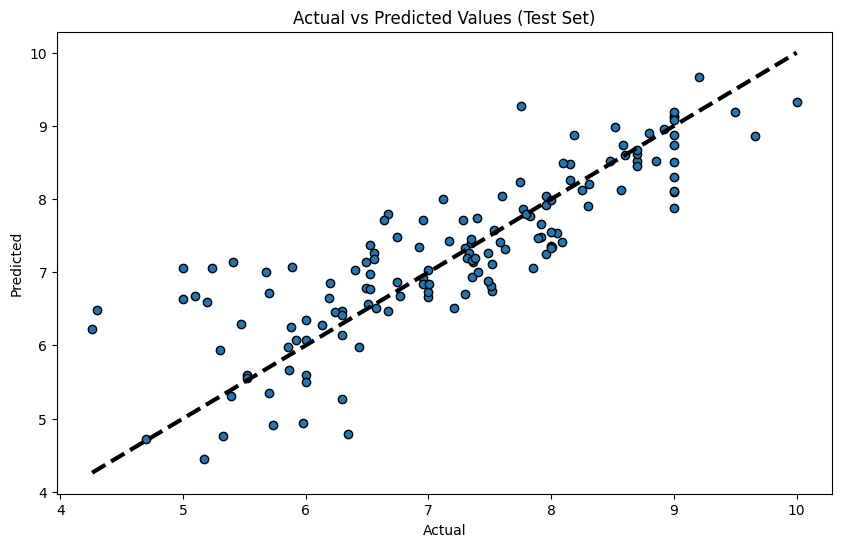

Training Set Metrics:
R-Squared: 0.8205625890776963
Adjusted R-Squared: 0.7930976792426498
Mean Squared Error (MSE): 0.3120688671062846
Mean Absolute Error (MAE): 0.41960970731930985
Mean Absolute Percentage Error (MAPE): 6.310597088479806

Testing Set Metrics:
R-Squared: 0.7033143937180512
Adjusted R-Squared: 0.36617165930674567
Mean Squared Error (MSE): 0.45042800174586695
Mean Absolute Error (MAE): 0.48606935204547075
Mean Absolute Percentage Error (MAPE): 7.549223860004756


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


X = merged_data


# Split the data
X_train, X_test, y_train, y_test = train_test_split(merged_data, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


# **LASSO regression**

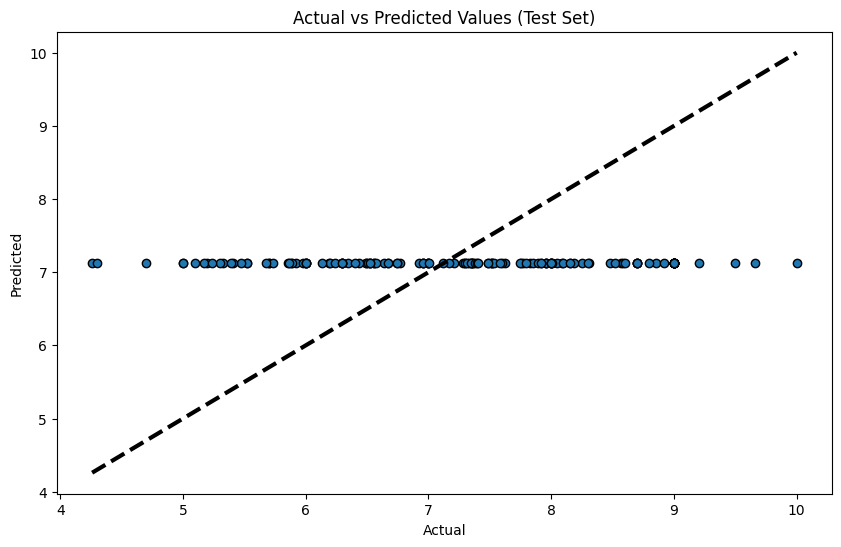

Training Set Metrics:
R-Squared: 0.0
Adjusted R-Squared: -0.15306122448979598
Mean Squared Error (MSE): 1.7391516379012526
Mean Absolute Error (MAE): 1.1010040095046596
Mean Absolute Percentage Error (MAPE): 16.820273997139623

Testing Set Metrics:
R-Squared: -0.002966942647611326
Adjusted R-Squared: -1.1427021047471695
Mean Squared Error (MSE): 1.5227041225741178
Mean Absolute Error (MAE): 1.031310890322935
Mean Absolute Percentage Error (MAPE): 15.106686928316751


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
X = merged_data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from numpy import absolute
from numpy import mean
from numpy import std
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = Lasso(alpha  =1.0)
model.fit(X_train , y_train)
# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()


# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')